<a href="https://colab.research.google.com/github/faseenafarz/machine-learning/blob/main/car_insurance_claim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Car Insurance Data**

Insurance Claims over Cars

In [ ]:
#Import the Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np
#Read the dataset
df=pd.read_csv('/content/Car_Insurance_Claim.csv')
#Displaying the first rows of dataset
df.head()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


In [ ]:
#checking the datatypes
df.dtypes

ID                       int64
AGE                     object
GENDER                  object
RACE                    object
DRIVING_EXPERIENCE      object
EDUCATION               object
INCOME                  object
CREDIT_SCORE           float64
VEHICLE_OWNERSHIP      float64
VEHICLE_YEAR            object
MARRIED                float64
CHILDREN               float64
POSTAL_CODE              int64
ANNUAL_MILEAGE         float64
VEHICLE_TYPE            object
SPEEDING_VIOLATIONS      int64
DUIS                     int64
PAST_ACCIDENTS           int64
OUTCOME                float64
dtype: object

In [ ]:
#checking the null values
df.isna().sum()

ID                       0
AGE                      0
GENDER                   0
RACE                     0
DRIVING_EXPERIENCE       0
EDUCATION                0
INCOME                   0
CREDIT_SCORE           982
VEHICLE_OWNERSHIP        0
VEHICLE_YEAR             0
MARRIED                  0
CHILDREN                 0
POSTAL_CODE              0
ANNUAL_MILEAGE         957
VEHICLE_TYPE             0
SPEEDING_VIOLATIONS      0
DUIS                     0
PAST_ACCIDENTS           0
OUTCOME                  0
dtype: int64

there are null values in credit score and annual mileage

In [ ]:
p=df['CREDIT_SCORE'].mean()
df['CREDIT_SCORE'].fillna(p,inplace=True)
Q=df['ANNUAL_MILEAGE'].mean()
df['ANNUAL_MILEAGE'].fillna(p,inplace=True)

In [ ]:
df.isna().sum()

ID                     0
AGE                    0
GENDER                 0
RACE                   0
DRIVING_EXPERIENCE     0
EDUCATION              0
INCOME                 0
CREDIT_SCORE           0
VEHICLE_OWNERSHIP      0
VEHICLE_YEAR           0
MARRIED                0
CHILDREN               0
POSTAL_CODE            0
ANNUAL_MILEAGE         0
VEHICLE_TYPE           0
SPEEDING_VIOLATIONS    0
DUIS                   0
PAST_ACCIDENTS         0
OUTCOME                0
dtype: int64

In [ ]:
#dropping the unwanted columns
df.drop(['ID'],axis=1,inplace=True)
df.drop(['POSTAL_CODE'],axis=1, inplace=True)
df.drop(['RACE'],axis=1,inplace=True)
df.drop(['CHILDREN'],axis=1,inplace=True)

In [ ]:
#import libraries for data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

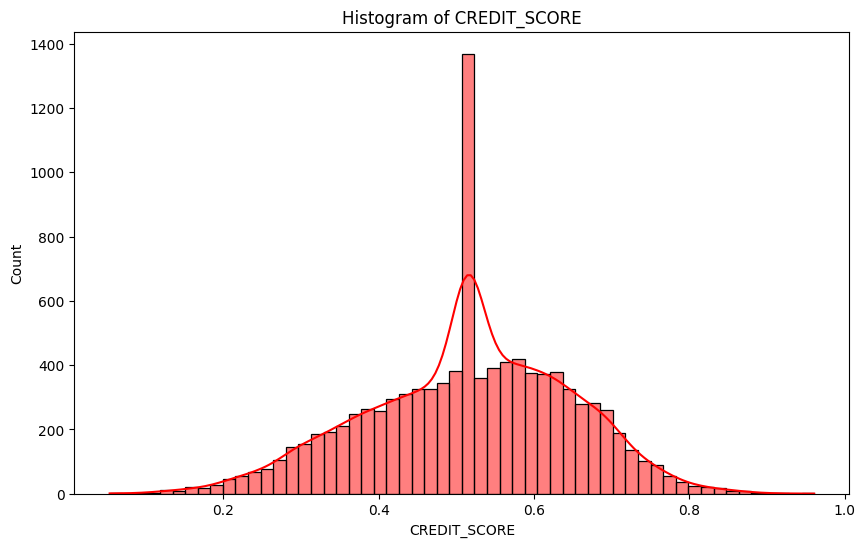

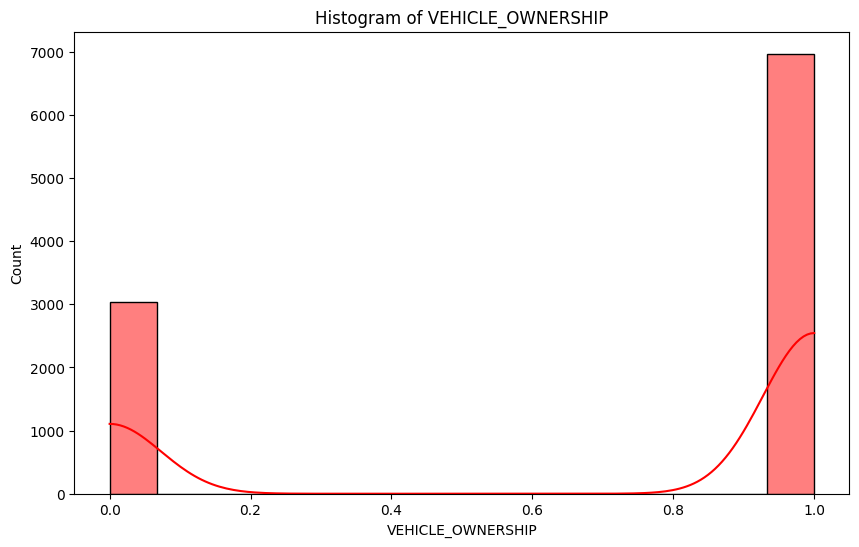

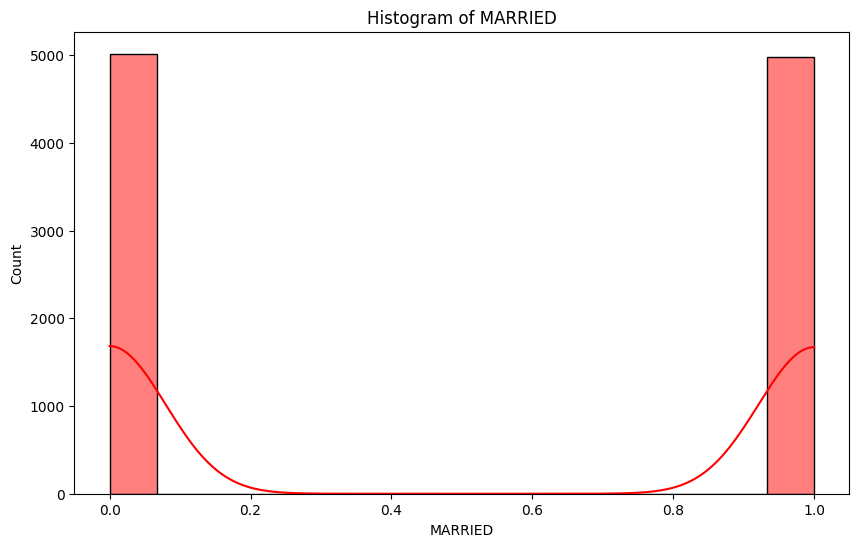

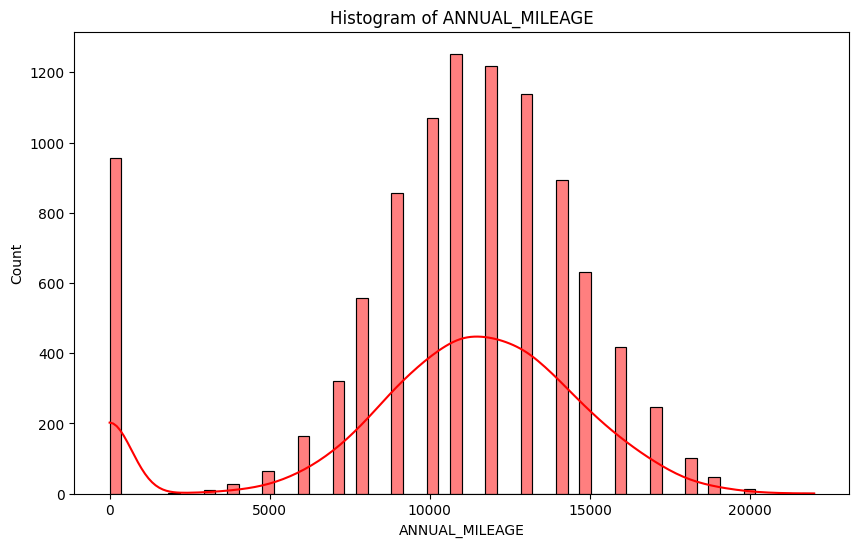

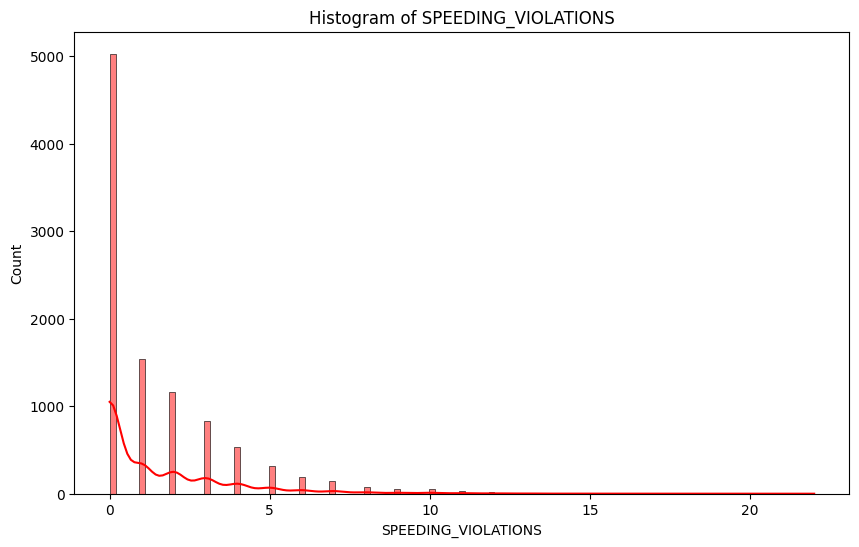

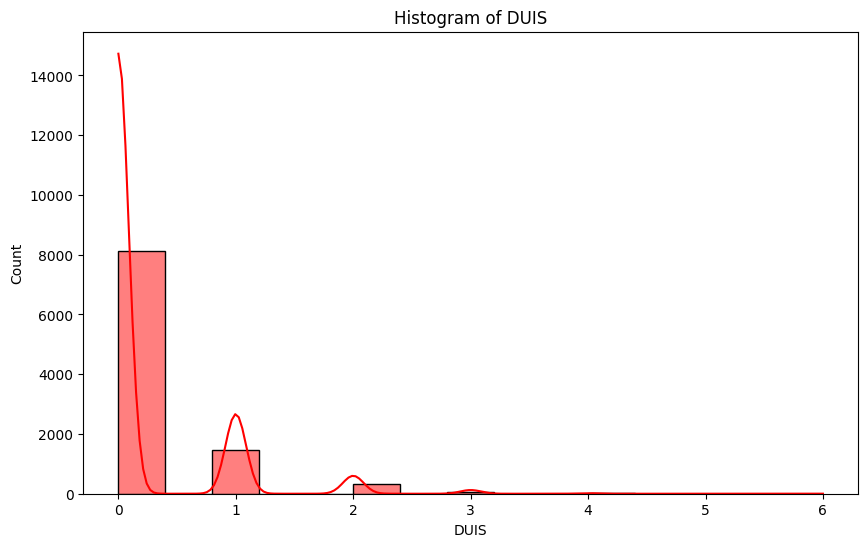

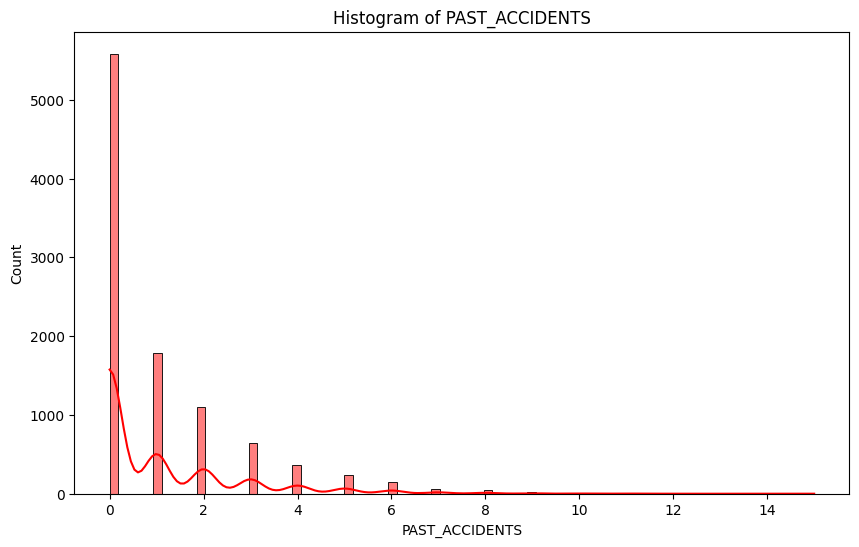

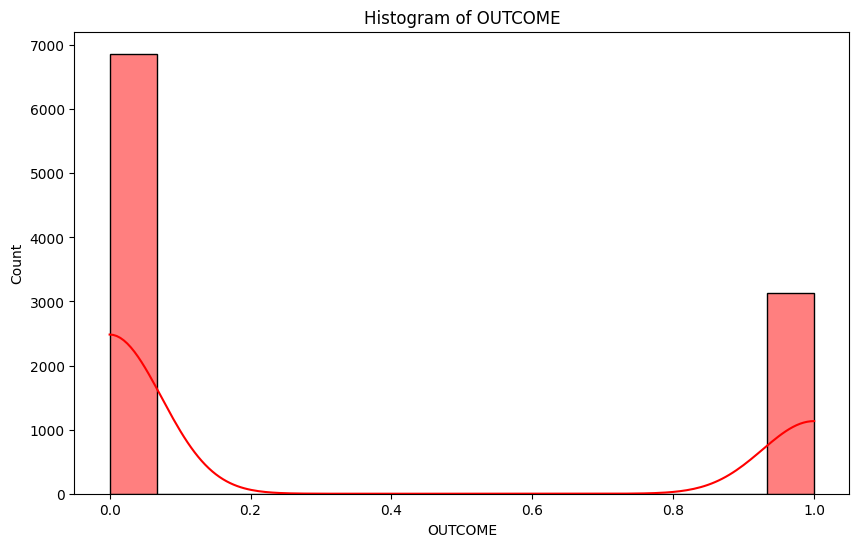

In [ ]:
# Histograms for numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], kde=True,color = 'red')
    plt.title(f'Histogram of {col}')
    plt.show()

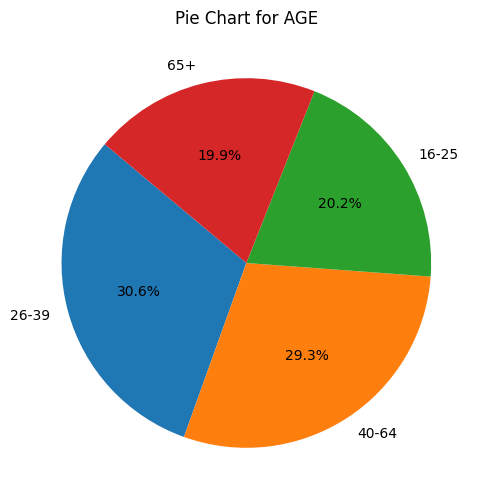

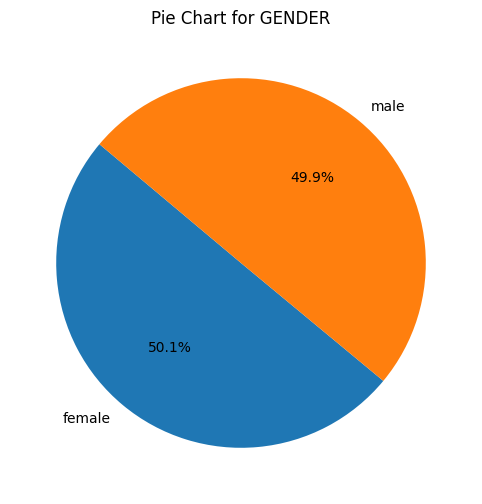

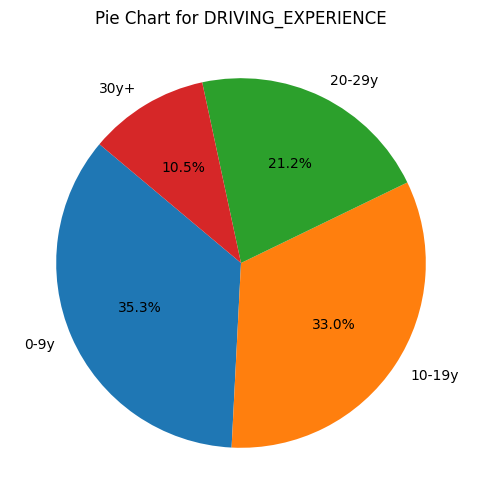

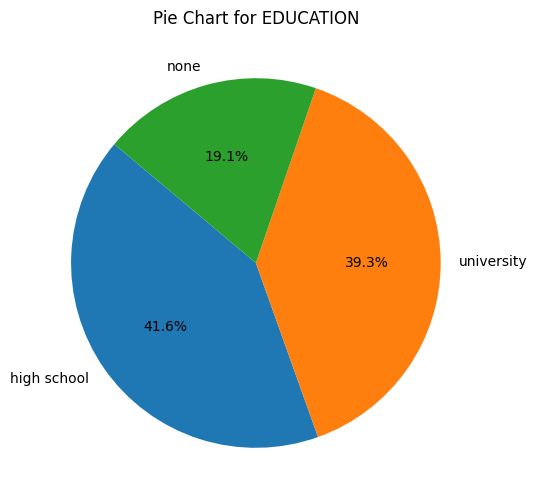

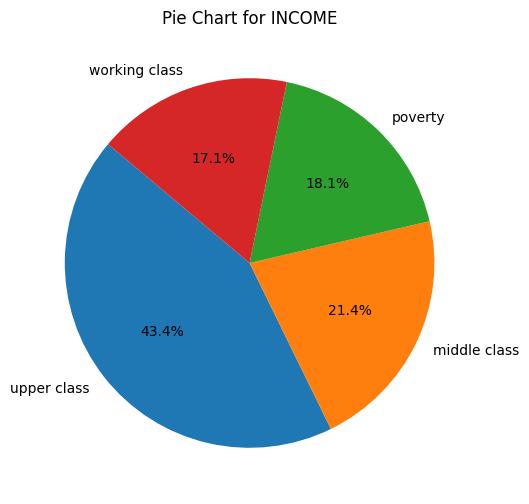

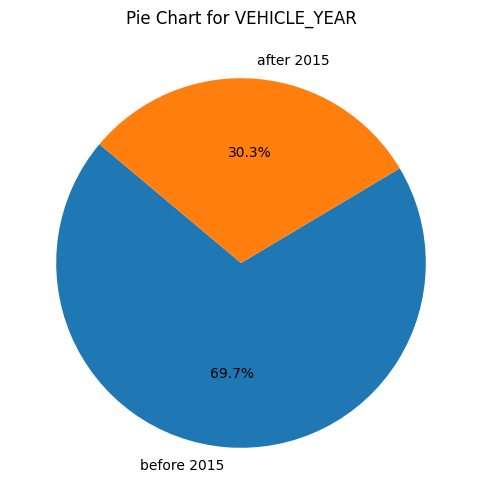

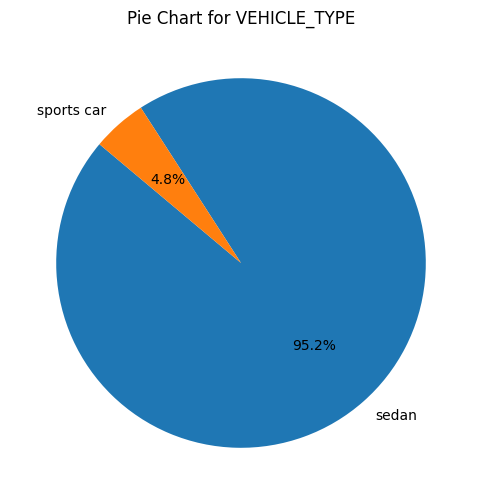

In [ ]:
#pie chart for categorical columns
categoricalcolumns=df.select_dtypes(include=['object']).columns
for feature in categoricalcolumns:
    counts = df[feature].value_counts()
    plt.figure(figsize=(10, 6))
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Pie Chart for {feature}')
    plt.show()

Bivariate analysis

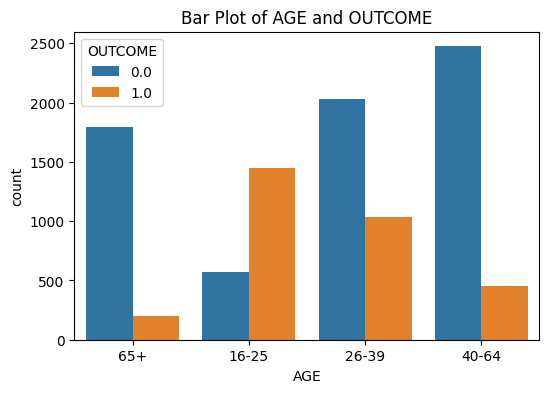

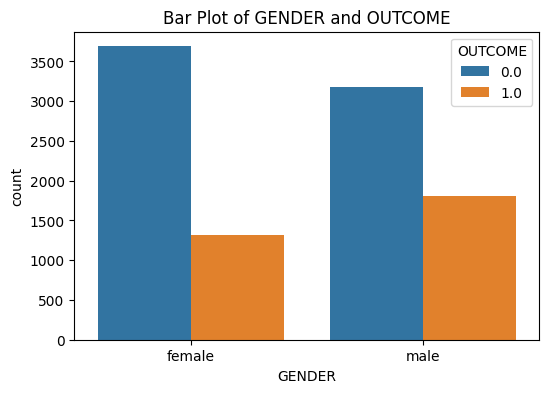

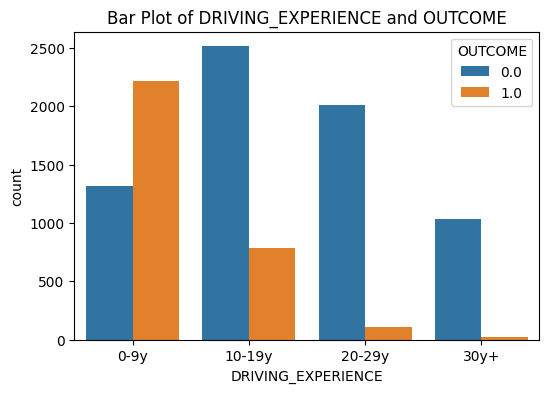

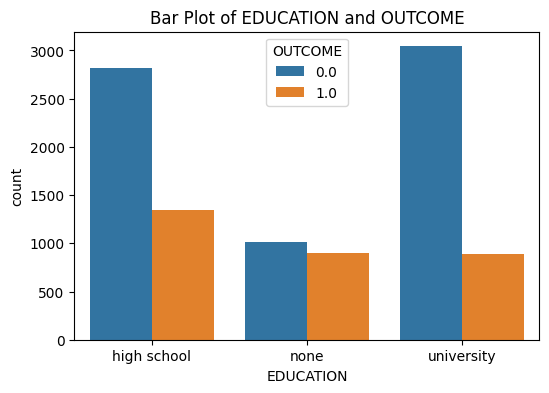

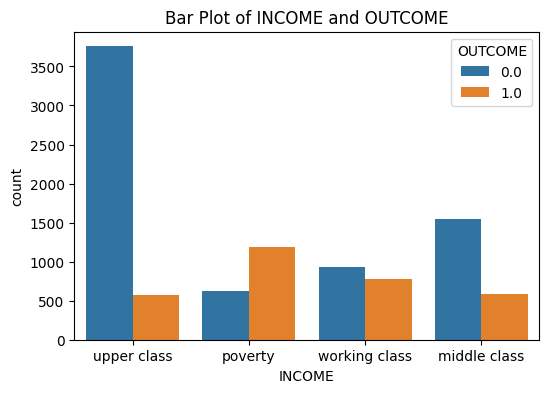

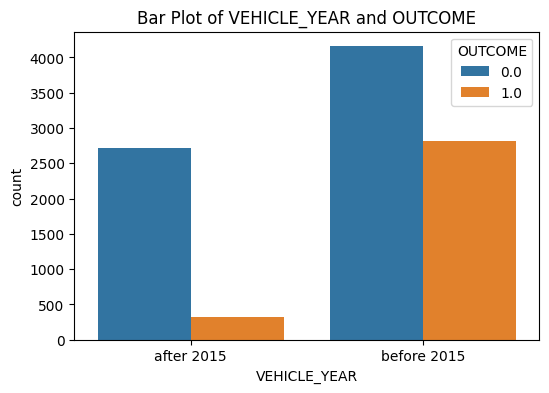

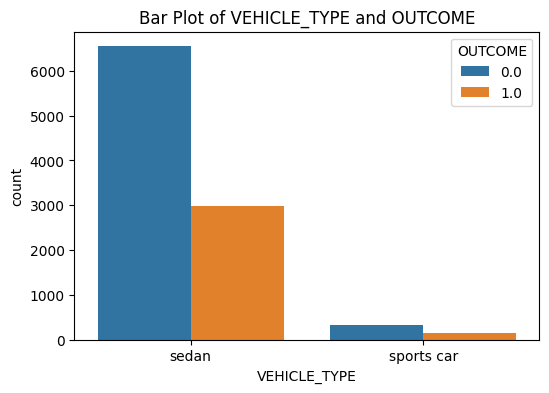

In [ ]:
for feature in categoricalcolumns:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=feature, hue='OUTCOME', data=df)
    plt.title(f'Bar Plot of {feature} and OUTCOME')
    plt.show()

From the bar charts, we can see that OUTCOME = 0 excels in several cases:

elder people,

people with 20+ years experience,

people with university degree,

people in the upper class,

people with vehicle,

vehicle year from 2015,

married people,

and people with children

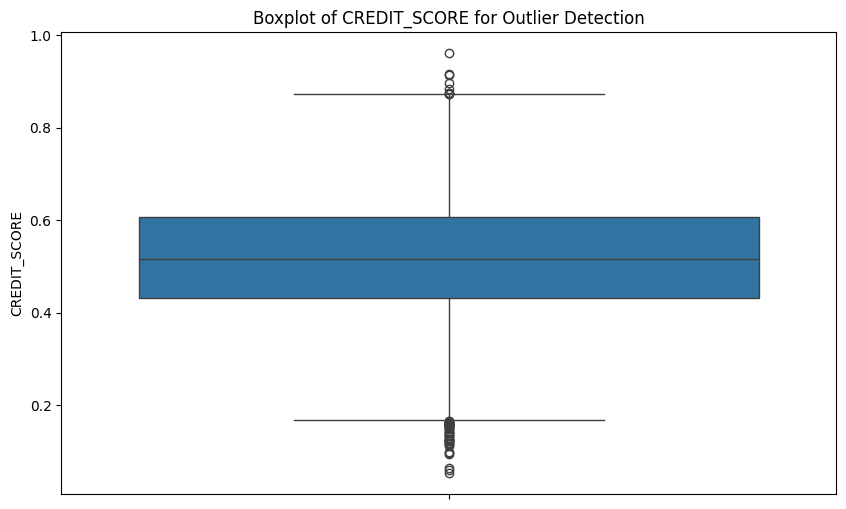

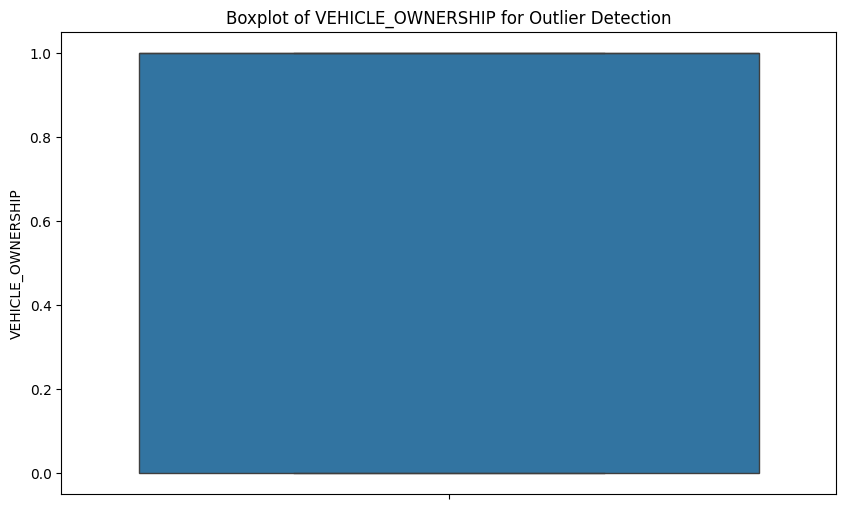

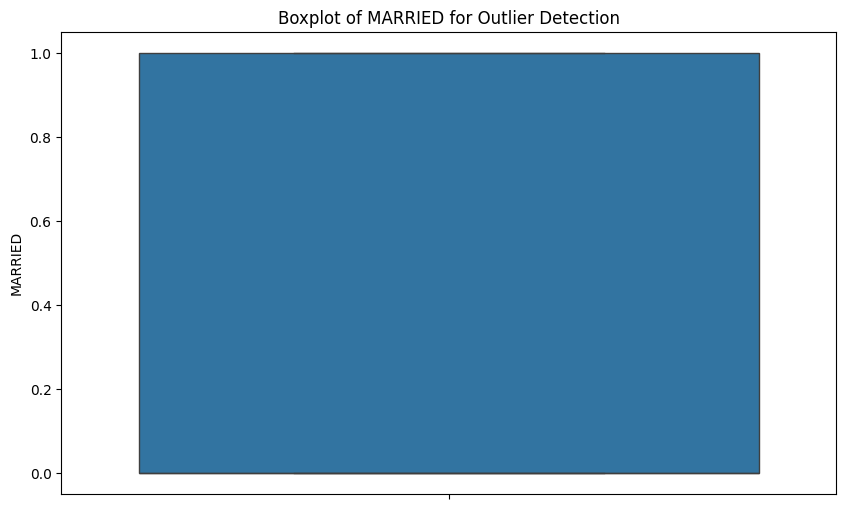

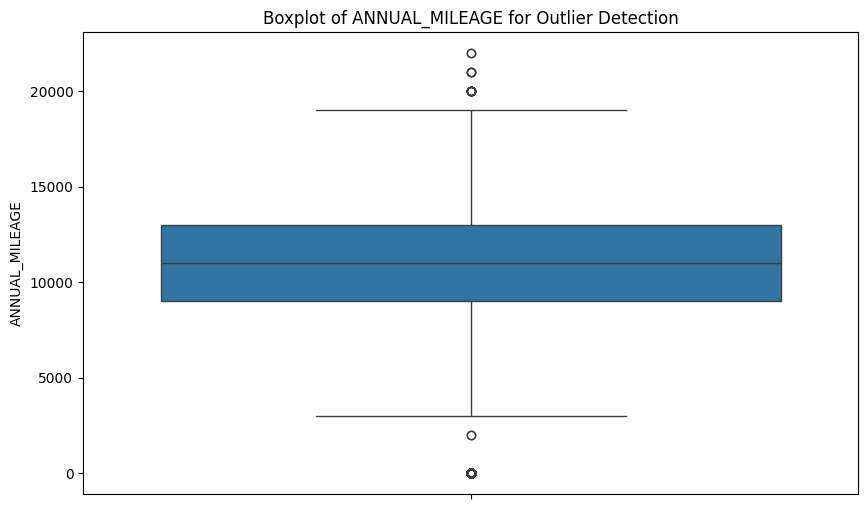

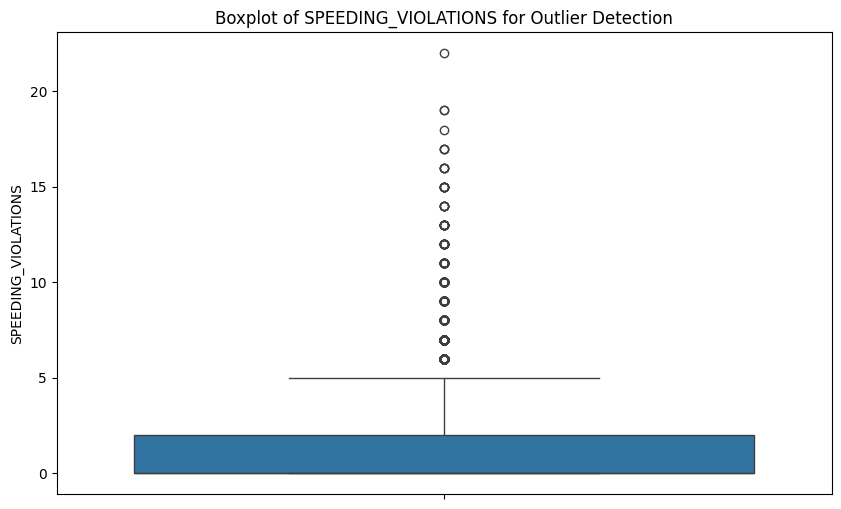

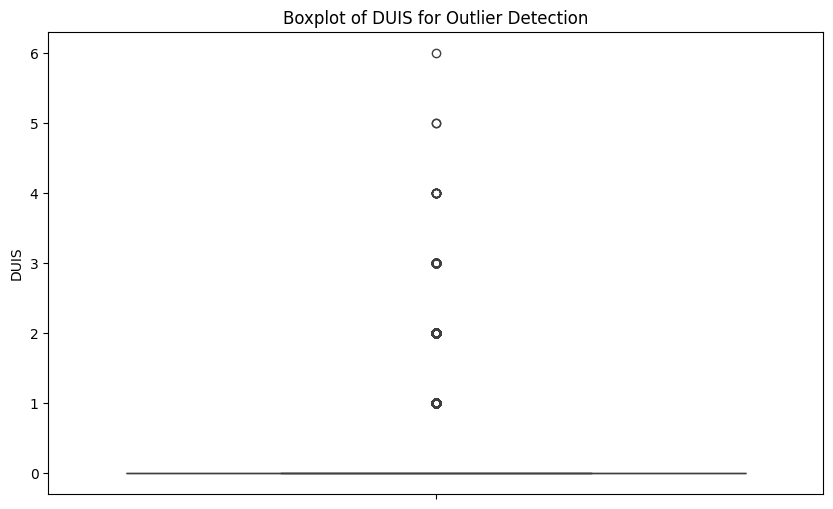

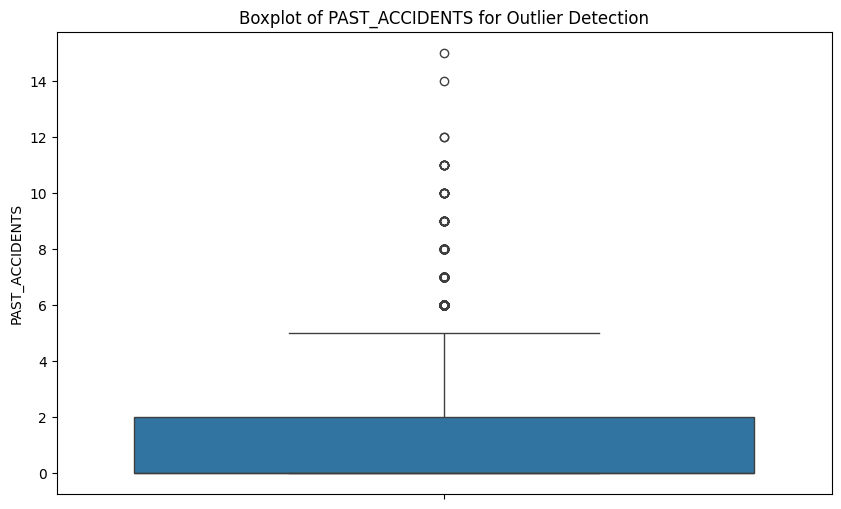

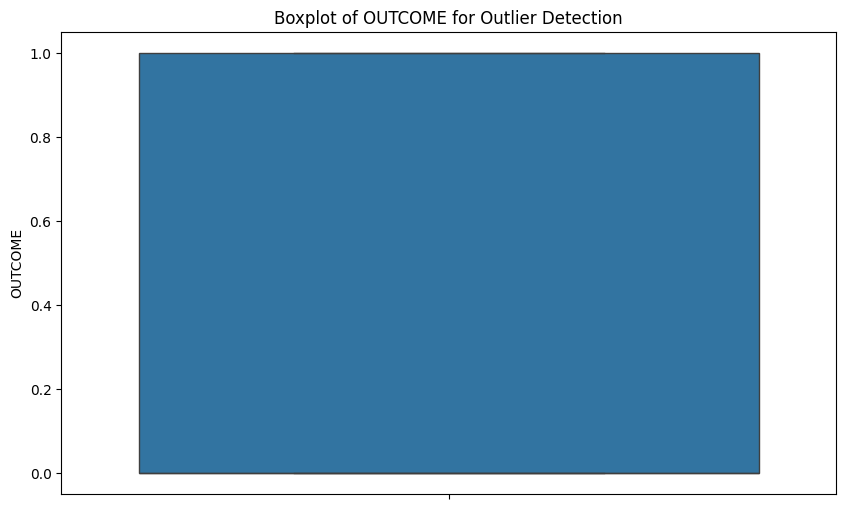

In [ ]:
# Outlier Detection
for col in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df[col])
    plt.title(f'Boxplot of {col} for Outlier Detection')
    plt.show()

In [ ]:
#outlier count
Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1
outliers_count_specified = ((df[numerical_columns] < (Q1 - 1.5 * IQR)) | (df[numerical_columns] > (Q3 + 1.5 * IQR))).sum()

outliers_count_specified

CREDIT_SCORE             57
VEHICLE_OWNERSHIP         0
MARRIED                   0
ANNUAL_MILEAGE          977
SPEEDING_VIOLATIONS     588
DUIS                   1882
PAST_ACCIDENTS          285
OUTCOME                   0
dtype: int64

while checking outlier count outliers are found in credit_score,annual_mileage,speeding_violations,duis,past_accidents.

In [ ]:
# Removing the outlier
#only keep rows in dataframe that have values within 1.5*IQR of Q1 and Q3
data_clean = df[~((df < (Q1-1.5*IQR)) | (df > (Q3+1.5*IQR))).any(axis=1)]

<ipython-input-13-fad1ea80c2f4>:3: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  data_clean = df[~((df < (Q1-1.5*IQR)) | (df > (Q3+1.5*IQR))).any(axis=1)]


In [ ]:
data_clean.shape

(6881, 15)

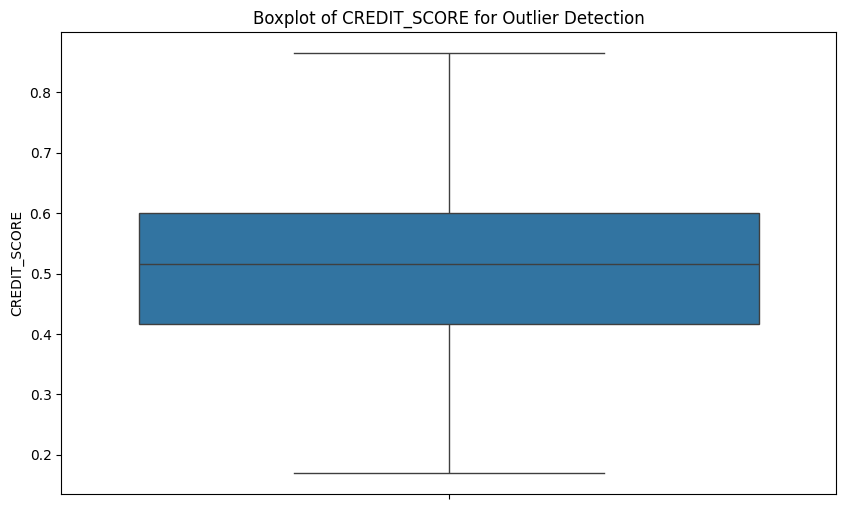

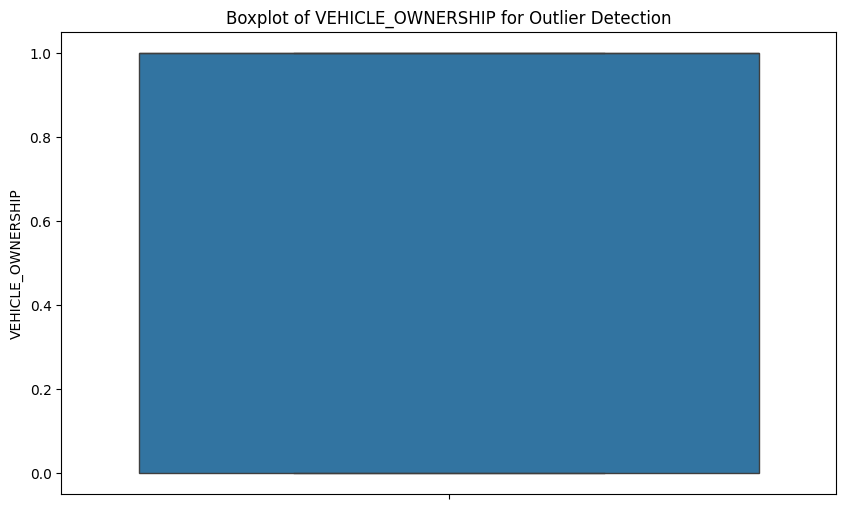

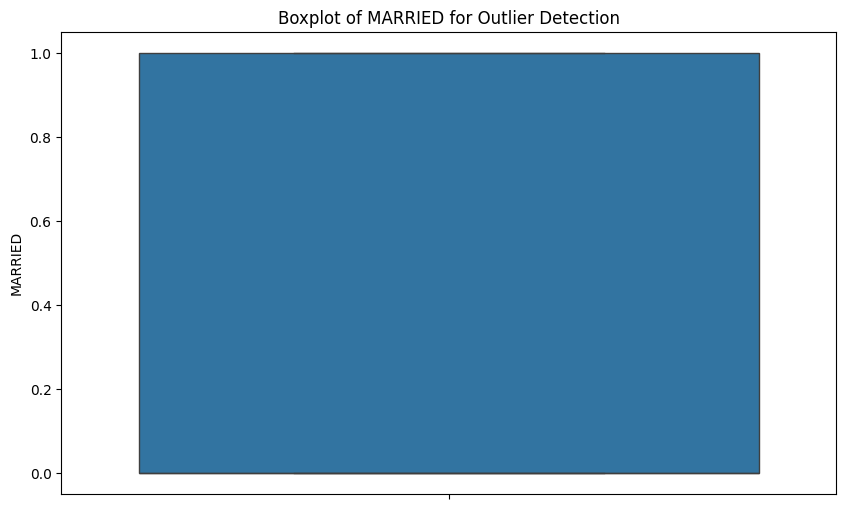

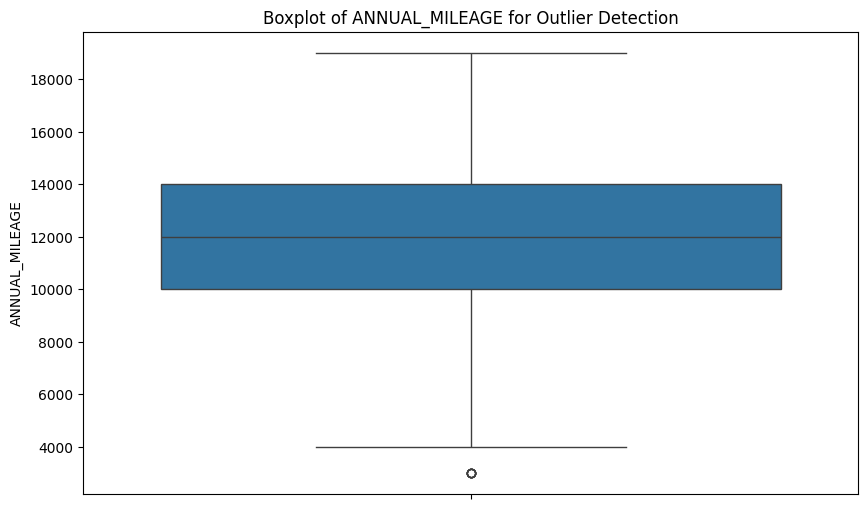

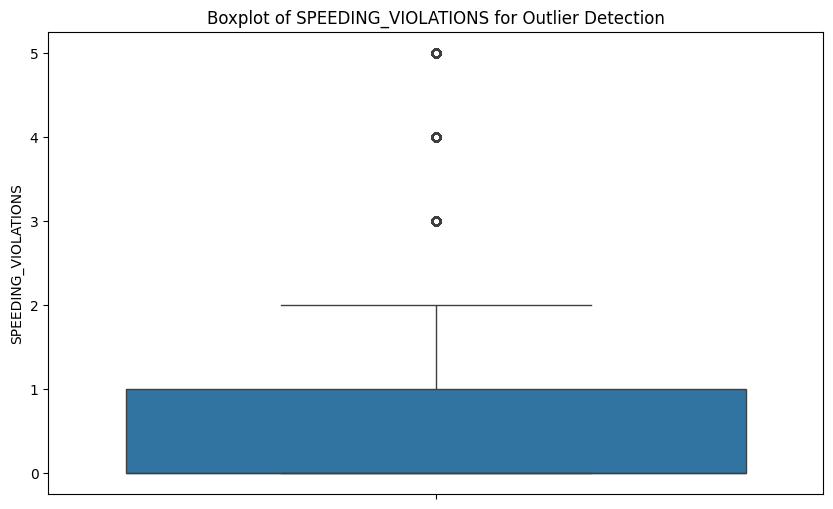

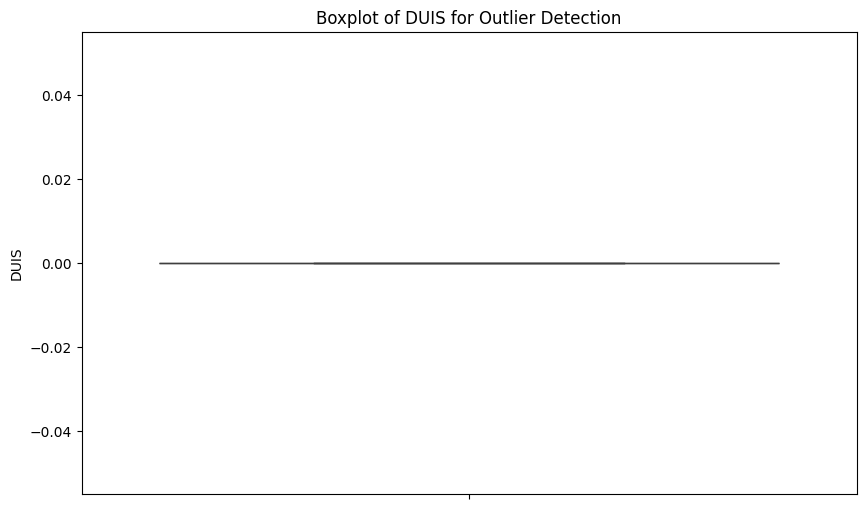

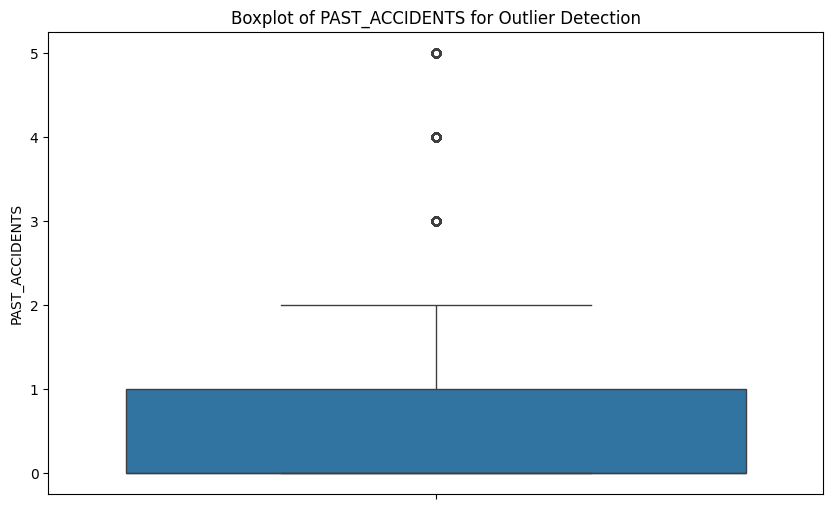

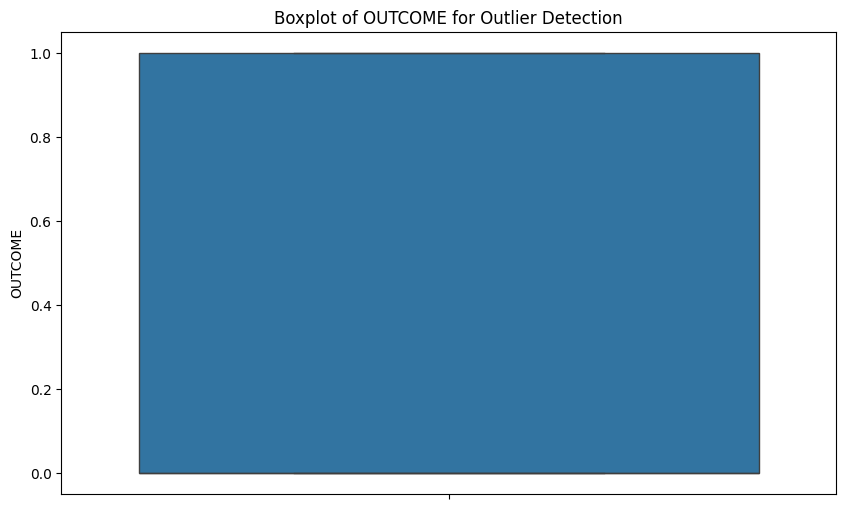

In [ ]:
# Outlier Detection
numericalcolumns= data_clean.select_dtypes(include=['float64', 'int64']).columns
for col in numericalcolumns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=data_clean[col])
    plt.title(f'Boxplot of {col} for Outlier Detection')
    plt.show()

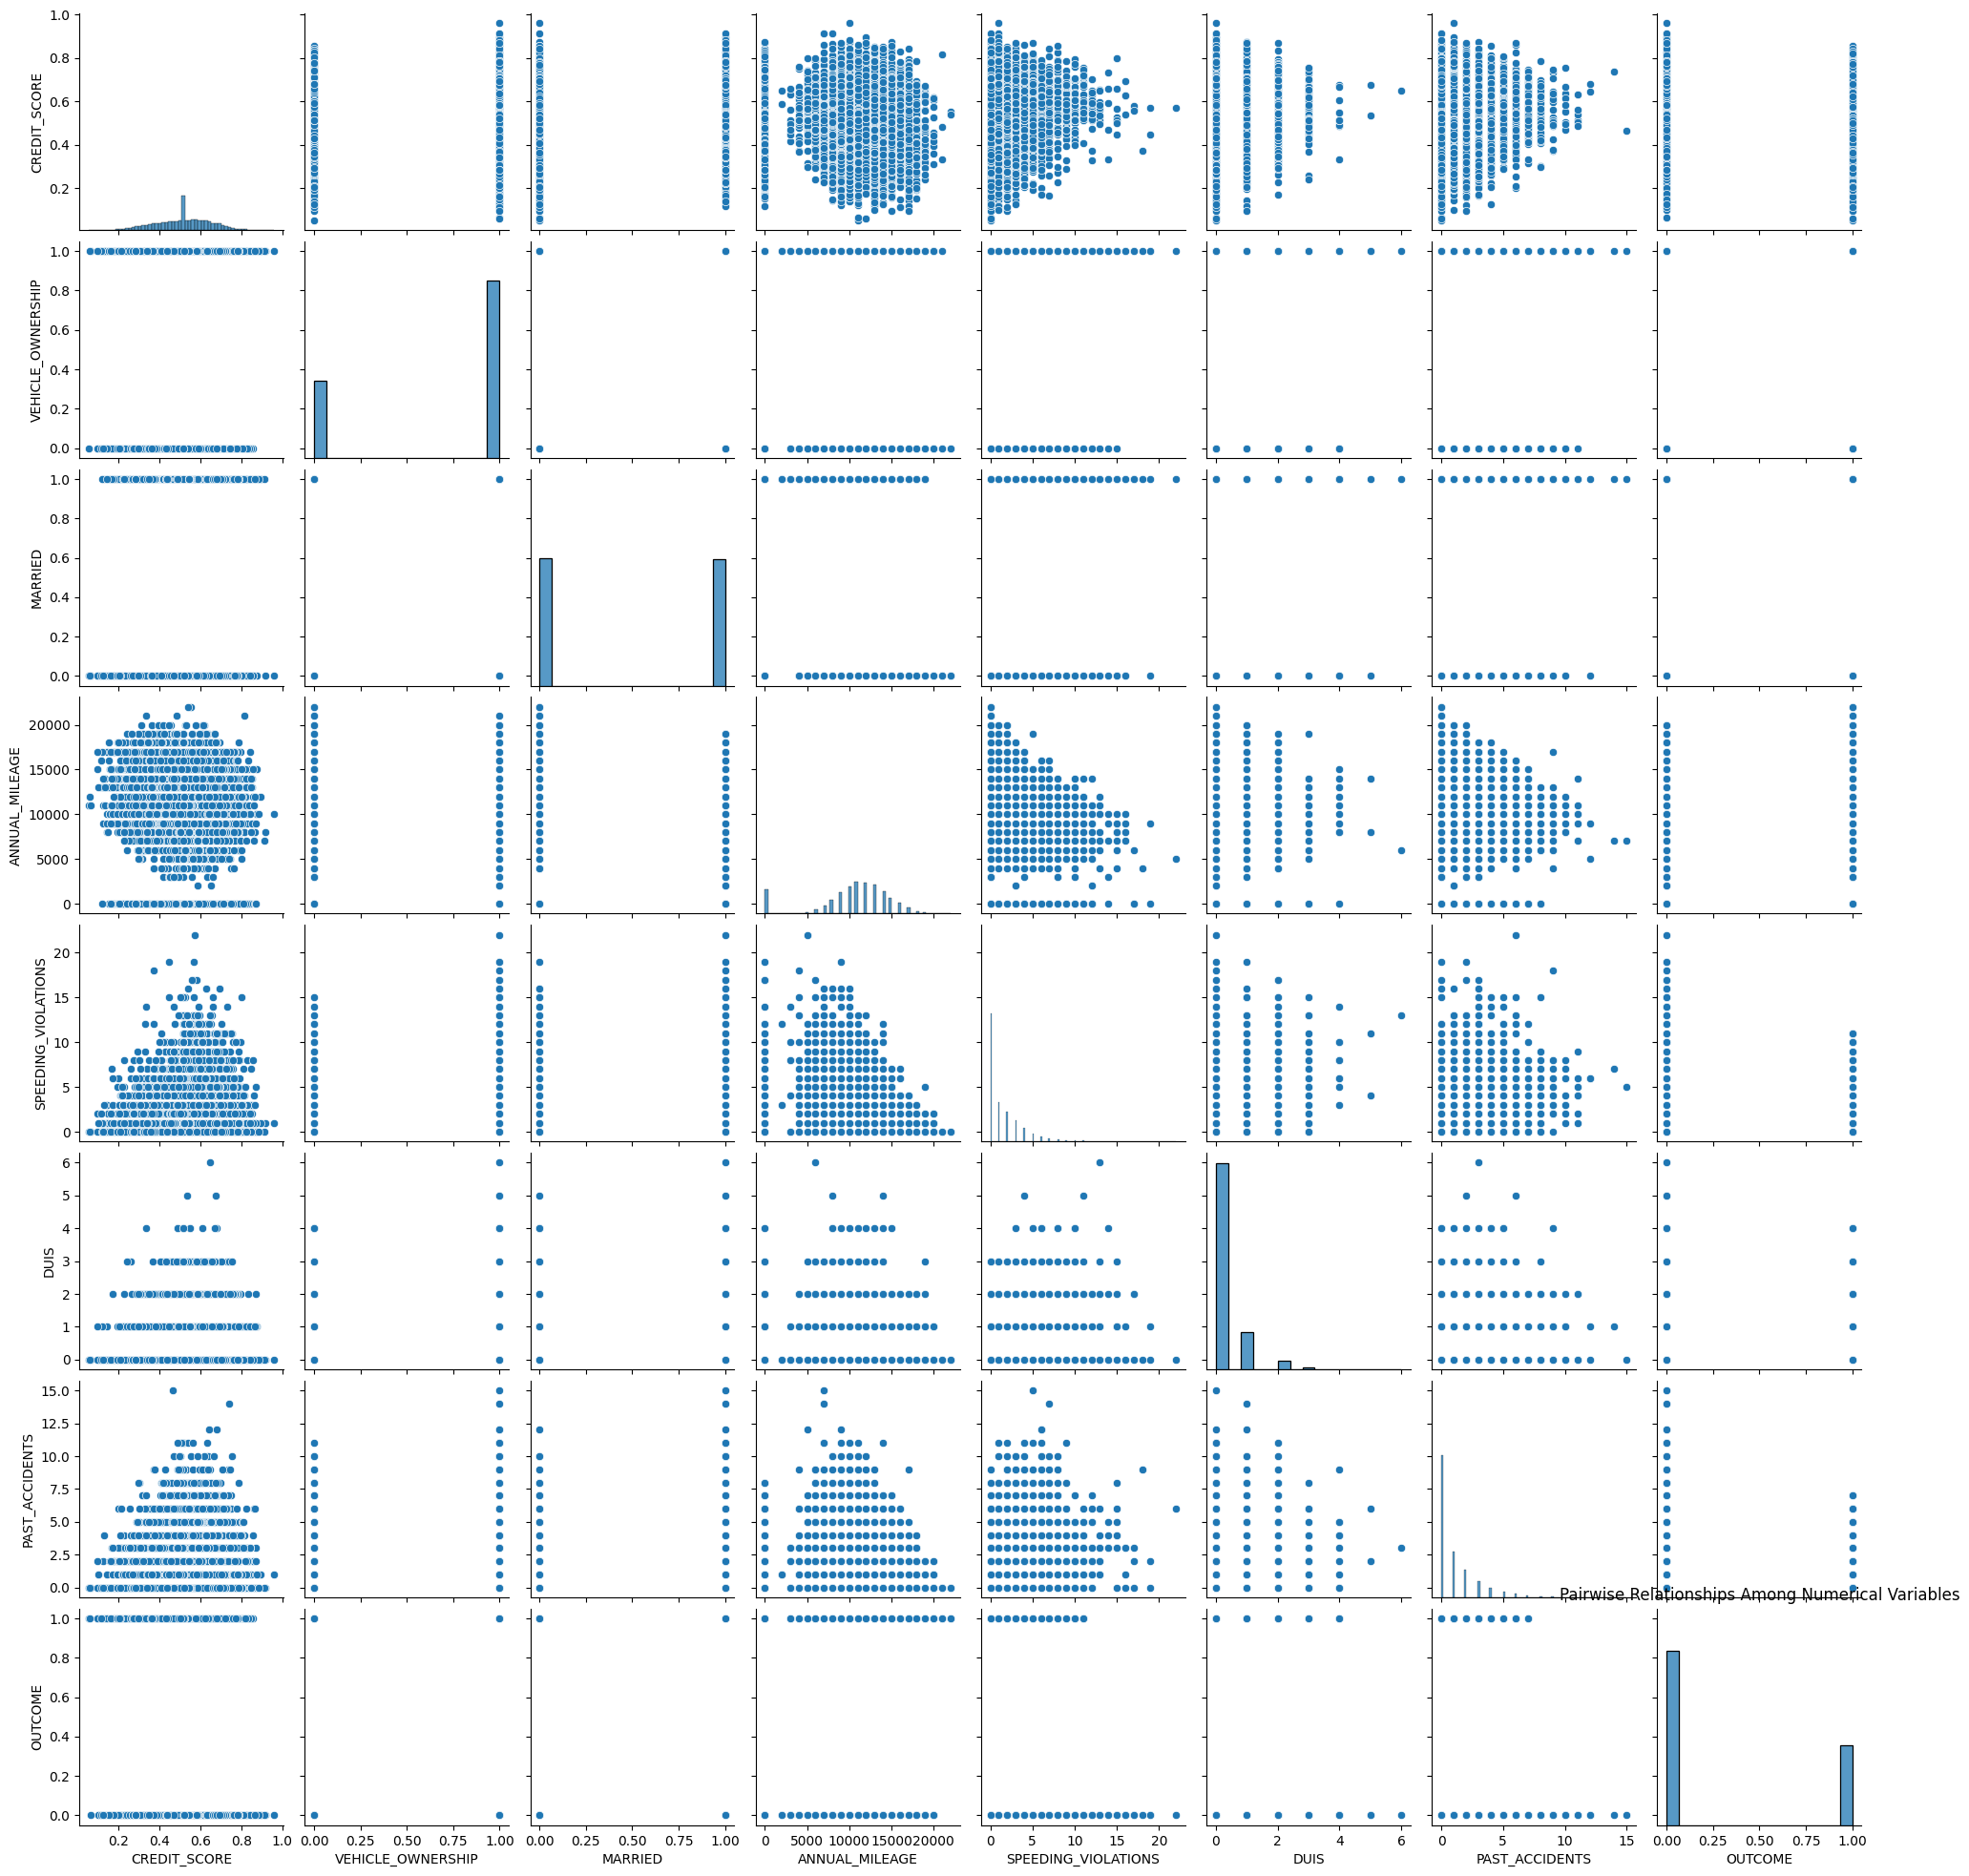

In [ ]:
# Pairwise Relationships
sns.pairplot(df[numerical_columns])
plt.title('Pairwise Relationships Among Numerical Variables')
plt.show()

In [ ]:
data_clean=df

In [ ]:
for i in categoricalcolumns:
  print(df[i].value_counts())

26-39    3063
40-64    2931
16-25    2016
65+      1990
Name: AGE, dtype: int64
female    5010
male      4990
Name: GENDER, dtype: int64
0-9y      3530
10-19y    3299
20-29y    2119
30y+      1052
Name: DRIVING_EXPERIENCE, dtype: int64
high school    4157
university     3928
none           1915
Name: EDUCATION, dtype: int64
upper class      4336
middle class     2138
poverty          1814
working class    1712
Name: INCOME, dtype: int64
before 2015    6967
after 2015     3033
Name: VEHICLE_YEAR, dtype: int64
sedan         9523
sports car     477
Name: VEHICLE_TYPE, dtype: int64


In [ ]:
from sklearn.preprocessing import LabelEncoder
lab=LabelEncoder()
for j in categoricalcolumns:
  df[j]=lab.fit_transform(df[j])

In [ ]:
# checking the datatypes
df.dtypes

AGE                      int64
GENDER                   int64
DRIVING_EXPERIENCE       int64
EDUCATION                int64
INCOME                   int64
CREDIT_SCORE           float64
VEHICLE_OWNERSHIP      float64
VEHICLE_YEAR             int64
MARRIED                float64
ANNUAL_MILEAGE         float64
VEHICLE_TYPE             int64
SPEEDING_VIOLATIONS      int64
DUIS                     int64
PAST_ACCIDENTS           int64
OUTCOME                float64
dtype: object

In [ ]:
x=df.iloc[:,:-1].values

In [ ]:
y=df['OUTCOME'].values

In [ ]:
# training and testing of data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=42)

In [ ]:
#normalisation
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
knn=KNeighborsClassifier(n_neighbors=7)
nb=GaussianNB()
sv=SVC()
d_tree=DecisionTreeClassifier(criterion='entropy')
r_forest=RandomForestClassifier(n_estimators=10,criterion='entropy')
lgbm=LGBMClassifier()
lst_model=[knn,nb,sv,d_tree,r_forest,lgbm]
for model in lst_model:
  print('classifier is:',model)
  model.fit(x_train,y_train)
  y_pred=model.predict(x_test)
  print('confusion matrix',confusion_matrix(y_test,y_pred))
  print('Accuracy score',accuracy_score(y_test,y_pred))
  print('*'*100)


classifier is: KNeighborsClassifier(n_neighbors=7)
confusion matrix [[1823  240]
 [ 275  662]]
Accuracy score 0.8283333333333334
****************************************************************************************************
classifier is: GaussianNB()
confusion matrix [[1527  536]
 [ 158  779]]
Accuracy score 0.7686666666666667
****************************************************************************************************
classifier is: SVC()
confusion matrix [[1847  216]
 [ 258  679]]
Accuracy score 0.842
****************************************************************************************************
classifier is: DecisionTreeClassifier(criterion='entropy')
confusion matrix [[1710  353]
 [ 345  592]]
Accuracy score 0.7673333333333333
****************************************************************************************************
classifier is: RandomForestClassifier(criterion='entropy', n_estimators=10)
confusion matrix [[1865  198]
 [ 351  586]]
Accuracy score 0.8